# Titanic Shipwreck: Predict Survivors

> The problem is from a kaggle competition and it is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. But before that, a little intro about the Titanic:

> The sinking of the Titanic is one of the most infamous shipwrecks in history.

> On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

> While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

> In this project, we will build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Since we look at the available data sets, let's import the training and test data sets at the beginning of our project. Utermost, will be exclusively working with the training set for analysis because we have the dependent outcome variable we are looking for available 'Survived'.

In [2]:
training_data = pd.read_csv('/kaggle/input/titanic/train.csv')

training_data.head() #we print the first few rows to kind off take a look at the columns and sample values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data Analysis

From the given information of the problem, the dictionary of the data set is given for the columns (we will use this as a guide for understanding the values in the data set):

![Data Dictionary](https://www.dropbox.com/s/avklkg0rzlbp15p/Titanic%20Data%20Dictionary.png?dl=1)

After seeing the different columns and their definition, it is important to know the data types in the data frame and which features are categorical and which are numerical.
### Which features are categorical? Which features are numerical?

In [3]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We get a lot of information from here combined with our knowledge of the data. We can deduce the following:
* Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
* Continous: Age, Fare. Discrete: SibSp, Parch.

Moreover, Age and Cabin have a lot of null values which need to be dealt with. Embarked has 2 null values. We will deal with those soon.

Note: we also need to check for those in our test data, which we will later.

In [4]:
training_data.describe() #as we are exploring the data, it might be helpful to see the distribution of numerical values across the sample

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Some insights we can gather:
* The training data is representative of almost 40% of the actual number of passengers (891 passenegers / 2224)
* survived is actually a categorical feature with 0 as not survived and 1 as survived
* around 38% survived from our training data set sample
* more than 75% of passengers did not travel with parents or children. more than 50% of passengers did not travel with siblings or spouses
* for Fare, the mean is 32 and 75% of passengers paid less than 32. which shows that their is a huge gap since the max is 512
* There aren't tha many elderly onboard. max is 80 while 75% of passengers are less than 38
> 

In [5]:
training_data.describe(include=['O']) #let's check the distribution of categorical features

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


#### Some insights we can gather:
* present passengers in our sample are predominantly males (65% = 566/891)
* Embarked has 3 possible values with 'S' port used by most passengers

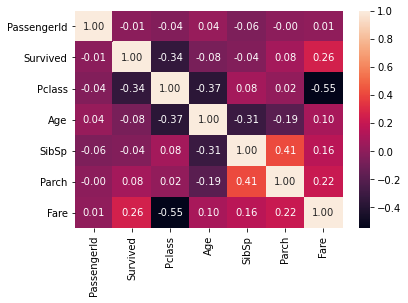

In [6]:
import seaborn as sns


sns.heatmap(training_data.corr(), annot=True, fmt=".2f"); #showing a heatmap to take a very quick look at correlations between features

This correlation heat map is not very accurate, but atleast it can give some insights. We can see that our outcome variable `Survived` is highly correlated with `Pclass` and `Fare`. The reason that this heat map might not be very accurate is because it is not normalized and that it might take some catogorical variables as continuous. 



## Explore by visualizing the data

More exploration can be done by visualization of the data, especially relationships that are not presentable by the correlation heat map above.

In the decisions of why the below visualizations were chosen, I guess it is a mix between trial and error and some biased guesses. (ex: one might infer that women and children might be prioritized in rescuing and evacuation scenarios)

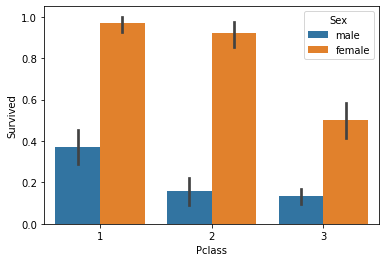

In [7]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training_data);


* it appears that as a women, if your were from class 1 or 2 (ie. higher classes), you had a 90% of surviving
* men in Pclass 1 also had almost 40% change of surviving, much higher than men in lower classes

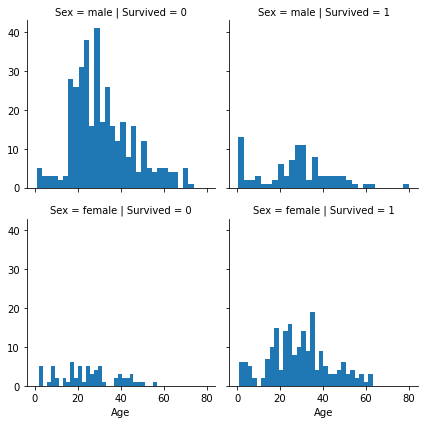

In [8]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(training_data, col='Survived', row='Sex')
g.map(plt.hist, 'Age', bins=30)

* ok, what I can read from the above is that most males that have survived were children. 
* and a loooooot of males did not survive. (though majority of passengers were males)



/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


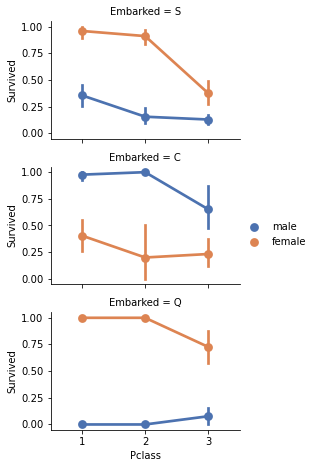

In [9]:
grid = sns.FacetGrid(training_data, row='Embarked', height=2.2, aspect=1.6);
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep');
grid.add_legend();

wow!!! males embarked from port 'C' just have high survival rates, even in the lowest class. I gotta dive deeper to check if this is because there is just high number of children males or all of them are Pclass 1 or what??

In [10]:
training_data[training_data.Embarked == 'C'].groupby(['Pclass','Sex']).Age.count()

Pclass  Sex   
1       female    38
        male      36
2       female     7
        male       8
3       female    16
        male      25
Name: Age, dtype: int64

In [11]:
training_data[training_data.Embarked == 'C'].groupby(['Pclass','Sex']).Age.mean()

Pclass  Sex   
1       female    36.052632
        male      40.111111
2       female    19.142857
        male      25.937500
3       female    14.062500
        male      25.016800
Name: Age, dtype: float64

In [12]:
training_data.groupby(['Embarked']).Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Nope, seems normal. Therefore, Embarked from 'C' tends to have high male survival rate :)
Actually, Embarked at 'C' generally has higher survival rate. Definitely, this feature is going into my ML model.

In [13]:
training_data[["Pclass", "Survived", 'Sex']].groupby(['Pclass', 'Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


Wow! it seems that for a female from Pclass 1 or 2, it is more than 90% of a survival rate.

I want to add age into that table, but I'll have to bin age before doing that.

In [14]:
training_data.Age = training_data.Age.fillna(-0.5)
bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
categories = pd.cut(training_data.Age, bins, labels=group_names)
training_data.Age = categories

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


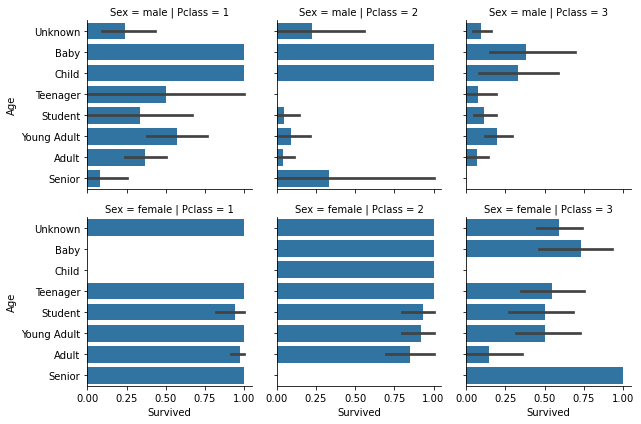

In [15]:
g = sns.FacetGrid(training_data, col='Pclass', row='Sex')
g.map(sns.barplot, 'Survived', 'Age')

This says a lot:
* All babies and children seem to have survived, excpect for Female Pclass 1 (I'm thinking there were no female children or babies at Pclass 1)
* Without doubt, the highest predictor of someone survived would be Sex , then Pclass....

# Machine Learning Model Fitting

I think we have explored the data enough to choose feature to include in our machine learning model, I chose:

1. Pclass
2. Sex
3. Age
4. Embarked
5. Fare (high correlation with survived from heatmap)

Though before fitting, we will simplify continuous features into groups.

In [16]:
def simplify_ages(df): #this is the same code we did for the training data put into a function to process test data
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df


def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def drop_features(df):
    return df.drop(['Ticket', 'Name', 'SibSp', 'Parch', 'Cabin'], axis=1)



training_data = simplify_fares(training_data)
training_data = drop_features(training_data)
training_data = training_data.dropna()

training_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,Student,1_quartile,S
1,2,1,1,female,Adult,4_quartile,C
2,3,1,3,female,Young Adult,1_quartile,S
3,4,1,1,female,Young Adult,4_quartile,S
4,5,0,3,male,Young Adult,2_quartile,S


### Repeat processing for test data
Since we like how the data frame looks, let's preprocess our test data as well

In [17]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

test = simplify_ages(test_data)
test_data = simplify_fares(test_data)
test_data = drop_features(test_data)
test_data = test_data.dropna()

test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked
0,892,3,male,Young Adult,1_quartile,Q
1,893,3,female,Adult,1_quartile,S
2,894,2,male,Senior,2_quartile,Q
3,895,3,male,Young Adult,2_quartile,S
4,896,3,female,Student,2_quartile,S


After getting our data frame with the features we desire for ML fitting, we need to normalize labels and encode them into a number to be enabled for algorithms. LabelEncoder in Scikit-learn will convert each unique string value into a number

In [18]:
from sklearn import preprocessing

def encode_features(df_train, df_test): 
    features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
training_data, test_data = encode_features(training_data, test_data)
training_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,2,1,4,0,2
1,2,1,0,0,0,3,0
2,3,1,2,0,7,0,2
3,4,1,0,0,7,3,2
4,5,0,2,1,7,1,2


## Fitting models
Now we start fiting a couple of models, lets see the results and compare.

In [19]:
#defining our train and test sets for fitting
X_train = training_data.drop(["Survived","PassengerId"], axis=1) #dropping outcome variable and PassengerId because its irrelevant
Y_train = training_data["Survived"]
X_test  = test_data.drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape #checking shapes

((889, 5), (889,), (418, 5))

In [20]:
# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

Now we try the various machine learning models and check their accuracy.

Note: 
* Best practice is to do a train/test split to validate the model on unseen data. However, we I tried it before, it didn't perform very well.
* Also, I'd usually rather do GridSearch to see best hyper parameters for the model, but I gave a poke at it before and haven't seen extraordinary better results, so I decided to keep it simple.

In [21]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

77.73

In [22]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.63

In [23]:
#K nearest Neighbor

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.26

In [24]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

75.93

In [25]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.95

# Ready for Submission

It seems the winner is Decision Tree, let's set up the submission file and see how it performs on the test set.

In [26]:
Y_pred = decision_tree.predict(X_test)

submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission.csv', index=False) #This file output is what is going to be submitted